In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

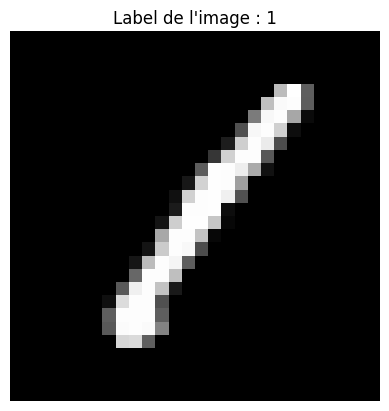

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données du fichier train.csv
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Extraire la première image (toutes les colonnes sauf la première, qui est le label)
first_image_pixels = train_data.iloc[0, 1:].values

# Reshaper les données de 1D (784) à 2D (28x28)
first_image_pixels = first_image_pixels.reshape(28, 28)

# Afficher l'image
plt.imshow(first_image_pixels, cmap='gray')
plt.title(f"Label de l'image : {train_data.iloc[0, 0]}")
plt.axis('off')  # Désactiver les axes pour une meilleure visualisation
plt.show()


In [2]:
# Obtenir le nombre de lignes et de colonnes dans le dataset
nombre_lignes, nombre_colonnes = train_data.shape
print(f"Nombre de lignes : {nombre_lignes}")
print(f"Nombre de colonnes : {nombre_colonnes}")


Nombre de lignes : 42000
Nombre de colonnes : 785


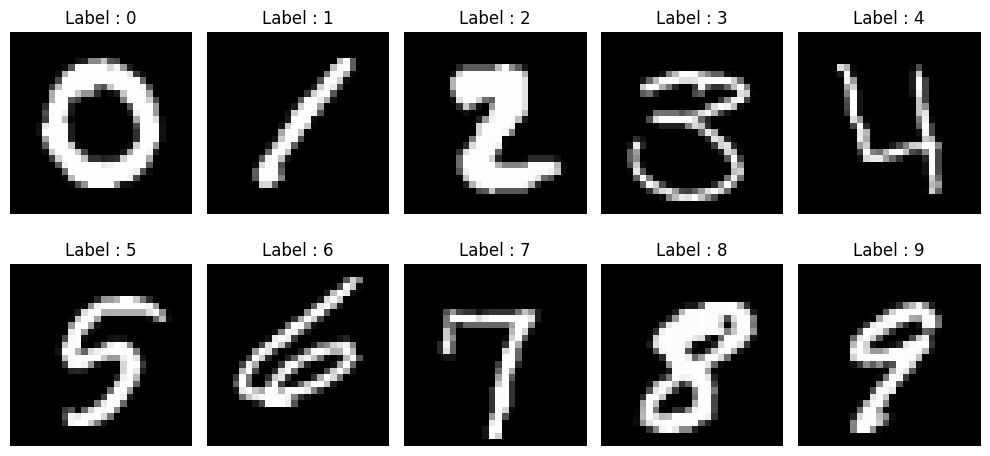

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données du fichier train.csv
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Trouver une image pour chaque label (de 0 à 9)
labels = range(10)  # Les labels vont de 0 à 9
images_par_label = []

# Parcourir les labels et sélectionner une image correspondant à chaque label
for label in labels:
    # Trouver la première ligne correspondant à ce label
    image_row = train_data[train_data['label'] == label].iloc[0, 1:].values
    images_par_label.append(image_row.reshape(28, 28))  # Reshaper en 28x28

# Afficher les 10 images (une pour chaque label)
plt.figure(figsize=(10, 5))
for i, image in enumerate(images_par_label):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label : {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparer les données (train_test_split) pour l'évaluation
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:, 1:], train_data['label'], test_size=0.2, random_state=42)

# Normaliser les pixels entre 0 et 1
X_train = X_train / 255.0
X_val = X_val / 255.0

# Modèle KNN avec k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy du modèle KNN : {accuracy * 100:.2f}%")


Accuracy du modèle KNN : 96.67%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values.astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int32')

X_test = test_data.values.astype('float32')

# Normalize data (pixel values are between 0 and 255, we scale it to [0, 1])
X_train /= 255.0
X_test /= 255.0

# Reshape into 28x28 images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a simple CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8713 - loss: 0.4064 - val_accuracy: 0.9794 - val_loss: 0.0681
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9837 - loss: 0.0555 - val_accuracy: 0.9786 - val_loss: 0.0617
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9889 - loss: 0.0341 - val_accuracy: 0.9852 - val_loss: 0.0524
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9910 - loss: 0.0259 - val_accuracy: 0.9883 - val_loss: 0.0377
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9877 - val_loss: 0.0524
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9952 - loss: 0.0152 - val_accuracy: 0.9864 - val_loss: 0.0454
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9855 - val_loss: 0.0508
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9967 -

In [3]:
# Prédiction sur le dataset de test avec le modèle CNN
y_test_pred_cnn = model.predict(X_test)
y_test_pred_cnn = np.argmax(y_test_pred_cnn, axis=1)

# Créer le fichier de soumission
submission_v4 = pd.DataFrame({
    'ImageId': range(1, len(y_test_pred_cnn) + 1),
    'Label': y_test_pred_cnn
})

# Sauvegarder dans un fichier CSV
submission_v4.to_csv('submission_v4.csv', index=False)

print("Fichier de soumission 'submission_v4.csv' généré avec succès.")


875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
Fichier de soumission 'submission_v4.csv' généré avec succès.


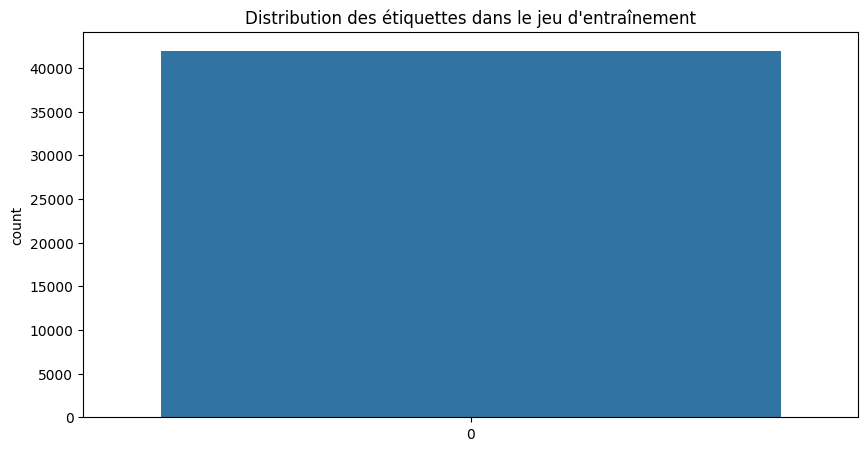

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données d'entraînement et de test
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Extraire les étiquettes du jeu d'entraînement
Y_train = train['label']

# Extraire les images du jeu d'entraînement
X_train = train.drop(labels=['label'], axis=1)

# Libérer de la mémoire en supprimant le DataFrame train s'il n'est plus nécessaire
del train

# Visualiser la distribution des étiquettes
plt.figure(figsize=(10,5))
sns.countplot(Y_train)
plt.title('Distribution des étiquettes dans le jeu d\'entraînement')
plt.show()

# Normaliser les données en divisant par 255
X_train = X_train / 255.0
test = test / 255.0

# Redimensionner en (n_samples, 28, 28, 1)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# Convertir les étiquettes en one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=10)

# Séparer 10% des données pour la validation
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  test_size=0.1, random_state=42)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8371 - loss: 0.5117 - val_accuracy: 0.9795 - val_loss: 0.0641 - learning_rate: 0.0010
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.9757 - loss: 0.0809 - val_accuracy: 0.9871 - val_loss: 0.0429 - learning_rate: 0.0010
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9827 - loss: 0.0559 - val_accuracy: 0.9874 - val_loss: 0.0426 - learning_rate: 0.0010
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9865 - loss: 0.0438 - val_accuracy: 0.9912 - val_loss: 0.0331 - learning_rate: 0.0010
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9880 - loss: 0.0359 - val_accuracy: 0.9876 - val_loss: 0.0407 - learning_rate: 0.0010
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9906 - loss: 0.0311 - val_accuracy: 0.9900 - val_loss: 0.0348 - learning_rate: 0.0010
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.9912 - l

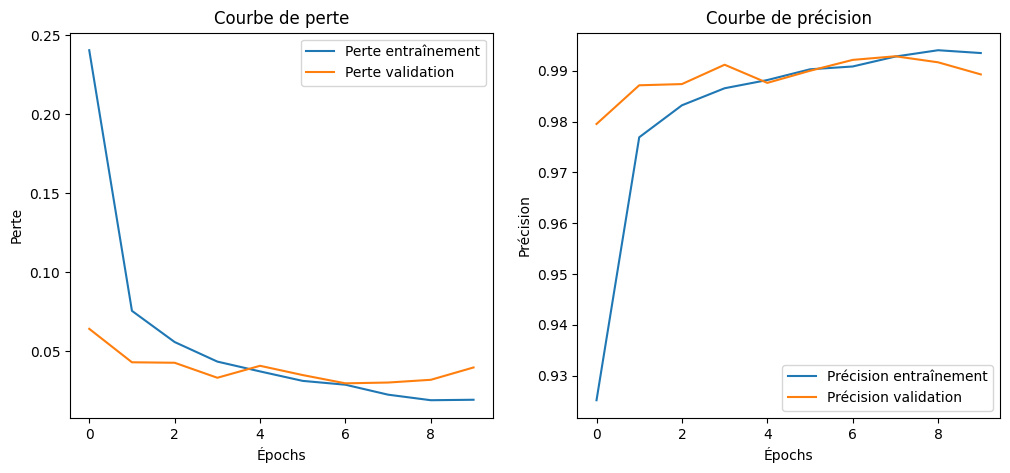

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Initialiser le modèle
model = Sequential()

# Ajouter des couches convolutionnelles et de pooling
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                 activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Couche de flattening et couches entièrement connectées
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Pour éviter le surapprentissage
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Réduire le taux d'apprentissage si l'amélioration stagne
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Définir les paramètres d'entraînement
epochs = 10
batch_size = 64

# Entraîner le modèle
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    callbacks=[learning_rate_reduction])

# Visualiser les performances du modèle
# Courbe de perte
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.legend()
plt.title('Courbe de perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')

# Courbe de précision
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.legend()
plt.title('Courbe de précision')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.show()

# Prédictions sur le jeu de test
predictions = model.predict(test)
# Convertir les prédictions en labels (classe avec la probabilité maximale)
predictions = np.argmax(predictions, axis=1)

# Créer un DataFrame pour la soumission
submission = pd.DataFrame({'ImageId': np.arange(1, len(predictions)+1),
                           'Label': predictions})

# Sauvegarder en CSV
submission.to_csv('submission.csv', index=False)


# fichier submission result : 0.98867